
# Data Integration and Analysis for Retail Sales Forecasting

## Objective:
The objective of this Jupyter Notebook is to demonstrate how effective **data integration techniques** can enhance data quality and improve decision-making accuracy in a retail setting. By combining multiple datasets—such as store attributes, sales records, and external economic factors—we can create a comprehensive view that helps in understanding and predicting sales trends.

## What is Data Integration?
Data integration involves combining data from different sources to provide a unified view. It plays a critical role in data science, especially in scenarios where data exists in silos across multiple platforms. Proper integration enables a more accurate analysis, improved data consistency, and a holistic understanding of the business context.

### Key Data Integration Techniques Covered:
1. **Data Merging and Joining**:
   - We will merge datasets using common identifiers (e.g., `Store` and `Date`) to bring together related information from multiple tables. For example, combining store features, sales data, and external economic indicators helps provide a complete view of factors influencing sales.

2. **Handling Inconsistent or Missing Data**:
   - When integrating data, inconsistencies such as missing values, differing formats, or out-of-date information often arise. We will address these issues by applying various data cleaning and preprocessing techniques to ensure data quality.

3. **Temporal Data Integration**:
   - Time-based data from different sources (e.g., sales figures, weather data, holidays) will be aligned using the `Date` field. This technique is essential for understanding patterns that vary over time, like sales spikes during holidays.

4. **Data Transformation**:
   - Raw data from different sources often require transformation to align formats, units, or structures. We will apply transformations to ensure all integrated data is consistent and ready for analysis.

5. **Feature Engineering from Integrated Data**:
   - Creating new features by combining information from different sources can lead to more powerful insights. For example, integrating fuel price data with sales records can help analyze the impact of external economic conditions on store performance.

## Approach:
1. **Data Loading & Integration**:
   - Load datasets (`features.csv`, `stores.csv`, `train.csv`, `test.csv`) and combine them using data integration techniques like merging, joining, and data transformation.
2. **Data Cleaning & Preprocessing**:
   - Clean and preprocess the data to handle missing values, format inconsistencies, and ensure data quality.
3. **Exploratory Data Analysis (EDA)**:
   - Use visualizations and statistical techniques to identify patterns, trends, and relationships within the integrated data.
4. **Model Building & Evaluation**:
   - Implement machine learning models to predict future sales based on historical data and external factors, and evaluate their performance.
5. **Conclusion & Insights**:
   - Summarize the key findings and insights derived from the integrated datasets, highlighting how data integration contributed to the overall analysis.

By implementing these data integration techniques, this notebook aims to showcase the importance of combining data from diverse sources to improve the accuracy and comprehensiveness of data-driven insights.


In [1]:
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from datetime import datetime


## Step 1: Data Loading and Preparation

We start by loading four key datasets that will form the basis of our analysis:

1. **`train.csv`**: Historical sales data across various stores and departments, used for model training.
2. **`test.csv`**: Sales data for testing and validating predictions.
3. **`features.csv`**: Additional store-specific features like temperature, fuel prices, markdowns, and economic factors, which could affect sales.
4. **`stores.csv`**: Basic store information, including type and size.

By integrating these datasets, we can analyze the combined data to uncover patterns and trends, ultimately improving our forecasting capabilities.

In [2]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")
df_features = pd.read_csv("/content/features.csv")
df_store = pd.read_csv("/content/stores.csv")

In [3]:
df_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


Now standardizing column names by:

1. **Converting to lowercase** for consistency, making it easier to reference without worrying about case.
2. **Replacing spaces with underscores** for better readability and avoiding syntax issues.

This makes the code cleaner, easier to write, and reduces the risk of errors when handling columns.

In [4]:
df_features.columns = df_features.columns.str.lower().str.replace(' ', '_')
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_store.columns = df_store.columns.str.lower().str.replace(' ', '_')

Looking at Features.csv


In [5]:
df_features.head(10)

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [6]:
print(df_features.columns)

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')


Here’s an overview of the typical columns in the `features.csv` file from that dataset:

1. **`Store`**: The store number.
2. **`Date`**: The date of the records.
3. **`Temperature`**: The average temperature in the region of the store.
4. **`Fuel_Price`**: The cost of fuel in the region.
5. **`MarkDown1` to `MarkDown5`**: Variables containing promotional markdown data, which can be used to analyze the effect of promotions on sales. They may not always be present.
6. **`CPI`**: Consumer Price Index, a measure that examines the weighted average of prices of consumer goods and services.
7. **`Unemployment`**: The unemployment rate in the store’s region.
8. **`IsHoliday`**: Boolean flag indicating whether the week includes a special holiday (True or False).

These columns provide a mix of store-specific information, economic indicators, and other external factors that can impact sales, making it ideal for analyzing patterns and predicting sales trends.

In [7]:
df_features.shape

(8190, 12)

In [8]:
# Check for missing values and data types
df_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         8190 non-null   int64  
 1   date          8190 non-null   object 
 2   temperature   8190 non-null   float64
 3   fuel_price    8190 non-null   float64
 4   markdown1     4032 non-null   float64
 5   markdown2     2921 non-null   float64
 6   markdown3     3613 non-null   float64
 7   markdown4     3464 non-null   float64
 8   markdown5     4050 non-null   float64
 9   cpi           7605 non-null   float64
 10  unemployment  7605 non-null   float64
 11  isholiday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
df_features.describe()

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Inspecting the data helps identify missing values, inconsistencies, and data types. This ensures data quality before integration, making the merge process smoother and accurate.

In [10]:
print(df_features.isnull().sum())

store              0
date               0
temperature        0
fuel_price         0
markdown1       4158
markdown2       5269
markdown3       4577
markdown4       4726
markdown5       4140
cpi              585
unemployment     585
isholiday          0
dtype: int64


Filling missing values during data integration is essential to ensure data completeness, consistency, and quality. It prevents inaccurate analysis by addressing gaps and discrepancies from multiple sources. Consistent handling of missing data enables accurate calculations, unbiased insights, and smoother operation of machine learning models, leading to more reliable and unified datasets for informed decision-making.









In [11]:
# filling missing values
df_features['cpi'].fillna(df_features['cpi'].median(),inplace=True)
df_features['unemployment'].fillna(df_features['unemployment'].median(),inplace=True)


<ipython-input-11-45c059bf4568>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features['cpi'].fillna(df_features['cpi'].median(),inplace=True)
<ipython-input-11-45c059bf4568>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [12]:
# Fill missing values in the MarkDown columns with 0
markdown_columns = ['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']
df_features[markdown_columns] = df_features[markdown_columns].fillna(0)


Checking for unique values in the dataframe

In [13]:
df_features.nunique()

,0
store,45
date,182
temperature,4178
fuel_price,1011
markdown1,4024
markdown2,2715
markdown3,2885
markdown4,3406
markdown5,4046
cpi,2505


**Convert Data Types**: Ensure Date is in the correct format and other fields are properly formatted. This is important because it ensures consistent, error-free integration, accurate time-based analysis, better performance, and seamless merging across data sources.

In [14]:
# Convert 'Date' to datetime format
df_features['date'] = pd.to_datetime(df_features['date'])

In [15]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         8190 non-null   int64         
 1   date          8190 non-null   datetime64[ns]
 2   temperature   8190 non-null   float64       
 3   fuel_price    8190 non-null   float64       
 4   markdown1     8190 non-null   float64       
 5   markdown2     8190 non-null   float64       
 6   markdown3     8190 non-null   float64       
 7   markdown4     8190 non-null   float64       
 8   markdown5     8190 non-null   float64       
 9   cpi           8190 non-null   float64       
 10  unemployment  8190 non-null   float64       
 11  isholiday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [16]:
df_train.shape

(421570, 5)

In [17]:
df_store.shape

(45, 3)

In [18]:
df_features.shape

(8190, 12)

### Information About Each DataFrame:
1. **`df_train` (421,570 rows, 5 columns)**:
   - Contains sales data, including store IDs, dates, departments, and sales figures. This will be the primary dataset for analysis.
   
2. **`df_store` (45 rows, 3 columns)**:
   - Includes information about the stores, such as store IDs, types, and sizes. This dataset can be merged to add store-specific details.

3. **`df_features` (8,190 rows, 12 columns)**:
   - Provides additional data like temperature, fuel price, CPI, and unemployment rates, with `Date` and `Store` as identifiers. This dataset contains external factors that may affect sales.



In [19]:
train_df = pd.merge(df_train,df_store,on='store',how='left')

In [20]:
train_df.head()

,store,dept,date,weekly_sales,isholiday,type,size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [21]:
df_features.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


Standardize Store Column Data Types: Convert the store columns to string format across all datasets to ensure compatibility when merging.

In [22]:
# Ensure store columns are treated as strings for consistent merging
df_features['store'] = df_features['store'].astype(str)
df_train['store'] = df_train['store'].astype(str)
df_store['store'] = df_store['store'].astype(str)

Convert Date Columns to Datetime Format: Transform the date columns to proper datetime objects to facilitate merging and time-based analysis.

In [23]:
# Convert date columns to datetime format to handle date-based operations smoothly
df_features['date'] = pd.to_datetime(df_features['date'])
df_train['date'] = pd.to_datetime(df_train['date'])



Clean Store Identifiers by Removing Extra Spaces: Remove any leading or trailing spaces from the store identifiers to avoid issues during the merge process.

In [24]:
# Strip any leading/trailing spaces in the store columns
df_features['store'] = df_features['store'].str.strip()
df_train['store'] = df_train['store'].str.strip()
df_store['store'] = df_store['store'].str.strip()

Combine df_features with df_train: Merge the feature data with the main sales dataset using store and date as keys to enrich sales records with external features.

In [25]:
# Merge feature data with training data on store and date
merged_df = pd.merge(df_features, df_train, on=['store', 'date'], how='inner')


Merge the Result with df_store: Finally, combine the result with the store information using store as the key, providing a full dataset with sales, features, and store attributes.

In [26]:
# Integrate store information with the previously merged dataset
final_df = pd.merge(merged_df, df_store, on='store', how='inner')


### Explanation:
1. **Why Standardize Data Types?**  
   Ensures consistent merging without data type conflicts.
2. **Why Convert to Datetime?**  
   Proper datetime format allows seamless date-based operations and ensures accurate integration when using `date` as a key.
3. **Why Strip Spaces?**  
   Removes any unintended spacing errors that could cause mismatches during the merge.
4. **Why Use Multiple Merges?**  
   Step-by-step merging allows careful integration of all necessary information, building a comprehensive dataset for analysis.

This version should be clear, informative, and distinct from the original, while still covering the essential data preparation steps.

In [27]:
final_df

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_x,dept,weekly_sales,isholiday_y,type,size
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False,B,118221
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False,B,118221
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False,B,118221
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False,B,118221


Convert date to Datetime Format with Error Handling: Ensures that all entries in the date column are converted to a standard datetime format. Any values that cannot be converted will be set to NaT (Not a Time).

Sort Data by Date: Organize the dataset chronologically based on the date column to make it easier to analyze trends over time.

In [28]:
final_df['date'] = pd.to_datetime(final_df['date'],errors='coerce')
final_df.sort_values(by=['date'],inplace=True)

Set the Date Column as the Index: This allows for more efficient time-based operations and makes it easier to perform time series analysis.

In [29]:
# Set the 'date' column as the index, enabling convenient time-based data manipulation
final_df.set_index(final_df['date'], inplace=True)


Preview the First Few Rows: Display the first few rows of the final DataFrame to verify the changes.

In [30]:
# Show the initial rows of the prepared DataFrame to confirm the transformations
final_df.head()


,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_x,dept,weekly_sales,isholiday_y,type,size
date,,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,False,A,151315
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,False,B,103681


To check if the columns isholiday_x and isholiday_y are identical, you can use the following code:

In [31]:
# Check if 'isholiday_x' and 'isholiday_y' are the same across all rows
are_holidays_same = final_df['isholiday_x'].equals(final_df['isholiday_y'])

# Print the result
print("Are 'isholiday_x' and 'isholiday_y' identical?:", are_holidays_same)

# Alternatively, display any rows where the values differ to investigate further
mismatch = final_df[final_df['isholiday_x'] != final_df['isholiday_y']]
print("Number of mismatched rows:", len(mismatch))
if not mismatch.empty:
    print(mismatch)


Are 'isholiday_x' and 'isholiday_y' identical?: True
Number of mismatched rows: 0


Since the columns `isholiday_x` and `isholiday_y` are identical, we can proceed to clean up the DataFrame by removing one of the duplicate columns and renaming the other for clarity.

### Code to Clean Up the Columns:
1. **Drop the Duplicate Column**:


In [32]:
# Remove 'isholiday_x' since it's a duplicate of 'isholiday_y'
final_df.drop(columns='isholiday_x', inplace=True)


2. **Rename the Remaining Column**:


In [33]:
# Rename 'isholiday_y' to 'IsHoliday' for better readability
final_df.rename(columns={"isholiday_y": "IsHoliday"}, inplace=True)


3. **Verify the Changes**:


In [34]:
# Check the DataFrame info to confirm the changes
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  object        
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  dept          421570 non-null  int64         
 12  weekly_sales  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  type          421570 non-null  object        
 15  s


### Explanation:
1. **Why Drop `isholiday_x`?**  
   Since `isholiday_x` and `isholiday_y` are the same, keeping both would be redundant. Removing one simplifies the dataset.

2. **Why Rename `isholiday_y` to `IsHoliday`?**  
   Renaming makes the column name cleaner and more intuitive, making it easier to reference in your analysis.

This process ensures your DataFrame is free of unnecessary duplication and is organized for further analysis or modeling.

In [35]:
final_df

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
date,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,24924.50,False,A,151315
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,3,14612.19,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,4,26323.15,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,5,36414.63,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,6,11437.81,False,B,103681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,49,7770.71,False,A,219622
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,50,1486.00,False,A,219622
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,52,4738.93,False,A,219622


##**Simulating Real-Time Data Integration**
In this example, we will use the pandas library to simulate reading data in batches from a CSV file. We will assume that new data is arriving every few seconds and that our system needs to process it as it arrives.

### Step 1: Modify the Simulation Function to Collect Processed Data



In [36]:
import pandas as pd
import time
import matplotlib.pyplot as plt

# Step 1: Modify the function to store processed data
def simulate_and_collect_data(filepath, batch_size=100, interval=2):
    """
    Simulate real-time data integration and collect processed data for visualization.

    Parameters:
    - filepath (str): Path to the CSV file.
    - batch_size (int): Number of rows to process at a time.
    - interval (int): Time interval (in seconds) between each batch, simulating real-time data arrival.

    Returns:
    - collected_data (DataFrame): A DataFrame containing all processed batches.
    """
    # Read the entire CSV file
    full_data = pd.read_csv(filepath)

    # Prepare an empty DataFrame to collect processed data
    collected_data = pd.DataFrame()

    # Get the total number of rows
    total_rows = full_data.shape[0]

    # Process the data in batches
    print(f"Total rows in the dataset: {total_rows}")
    print(f"Processing in batches of {batch_size} rows every {interval} seconds...\n")

    for start in range(0, total_rows, batch_size):
        # Determine the end of the current batch
        end = min(start + batch_size, total_rows)

        # Extract the current batch
        batch_data = full_data.iloc[start:end]

        # Add processed batch to the collected data
        collected_data = pd.concat([collected_data, batch_data])

        # Simulate processing (e.g., showing summary)
        print(f"Processed rows {start} to {end - 1}")

        # Simulate a delay
        time.sleep(interval)

    return collected_data


### Step 2: Process Data in Real-Time and Create Visualizations



Total rows in the dataset: 421570
Processing in batches of 100000 rows every 5 seconds...

Processed rows 0 to 99999
Processed rows 100000 to 199999
Processed rows 200000 to 299999
Processed rows 300000 to 399999
Processed rows 400000 to 421569


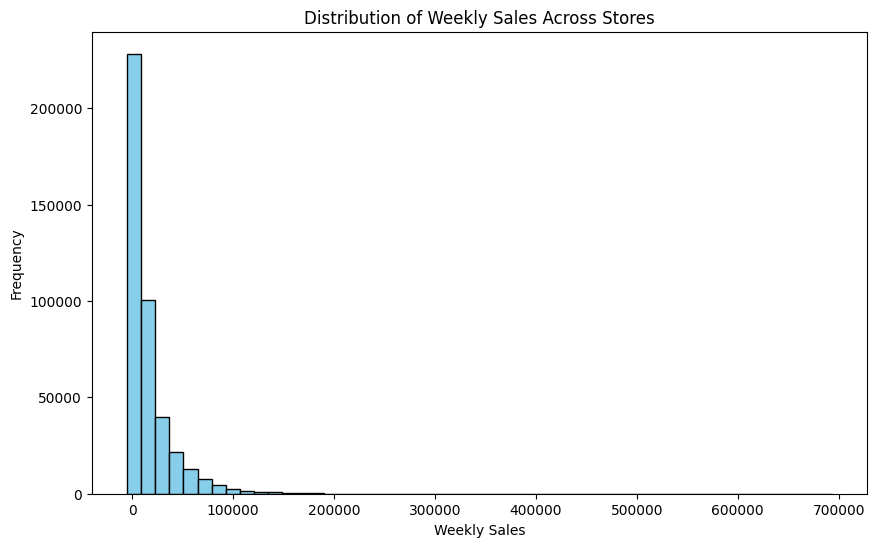

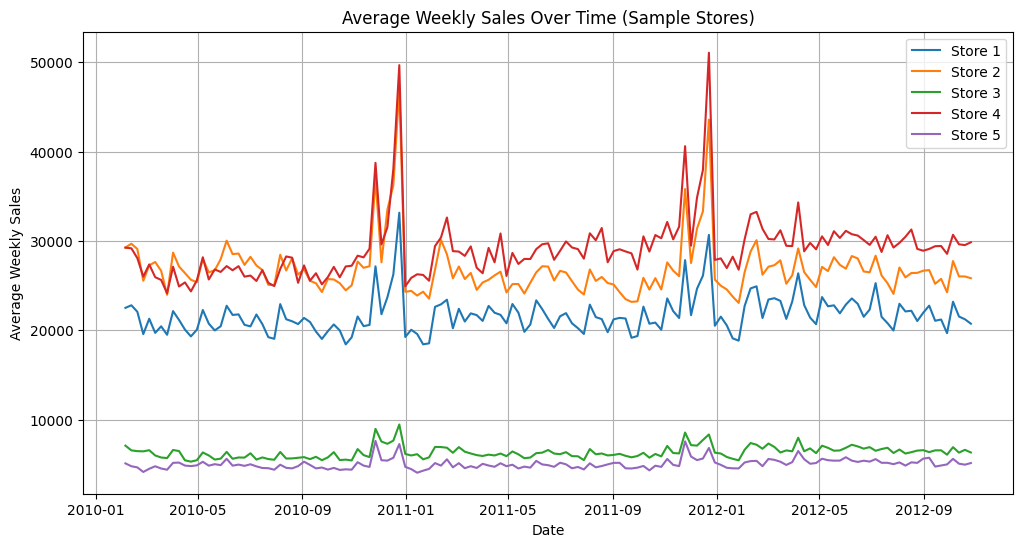

In [37]:
# Step 2: Use the function to simulate real-time processing and collect data
collected_data = simulate_and_collect_data('/content/train.csv', batch_size=100000, interval=5)

# Step 3: Generate a Visualization from the Collected Data
# Example: Visualize Weekly Sales Distribution Across Stores
plt.figure(figsize=(10, 6))
plt.hist(collected_data['Weekly_Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales Across Stores')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Example: Average Weekly Sales Per Store Over Time
avg_sales = collected_data.groupby(['Store', 'Date'])['Weekly_Sales'].mean().reset_index()
avg_sales['Date'] = pd.to_datetime(avg_sales['Date'])

plt.figure(figsize=(12, 6))
for store in avg_sales['Store'].unique()[:5]:  # Show trends for the first 5 stores as an example
    store_data = avg_sales[avg_sales['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')

plt.title('Average Weekly Sales Over Time (Sample Stores)')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


The **real-time data simulation** demonstrates how a system can handle **continuous** or p**eriodic data**, mimicking real-world scenarios where information arrives dynamically (e.g., sales transactions, sensor readings). This approach helps test the system’s ability to process data efficiently, ensuring low-latency responses and scalability. By simulating real-time processing, you can stress-test the system, optimize performance, and immediately generate insights, such as identifying trends or anomalies as data streams in. This is crucial for applications that rely on quick, continuous data integration, like retail analytics, financial trading, and IoT monitoring.

##Outlier Detection

To detect outliers, we can analyze the weekly_sales column using common statistical measures such as mean, median, and standard deviation. Outliers can be identified as data points that fall outside a specified range, such as beyond 3 standard deviations from the mean.

In [38]:
import pandas as pd
import numpy as np
import plotly.express as px

# Step 1: Aggregate Weekly Sales Data
agg_data = final_df.groupby(['store', 'dept']).weekly_sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()

# Step 2: Define a function to identify outliers
def detect_outliers(data, column, threshold=3):
    """
    Detects outliers based on standard deviation.

    Parameters:
    - data (DataFrame): The input data.
    - column (str): The column to detect outliers in.
    - threshold (float): The z-score threshold to classify as outlier. Default is 3.

    Returns:
    - DataFrame with an additional 'outlier' column indicating if a value is an outlier.
    """
    data['z_score'] = (data[column] - data[column].mean()) / data[column].std()
    data['outlier'] = np.where(np.abs(data['z_score']) > threshold, True, False)
    return data

# Step 3: Apply the function to detect outliers in weekly sales
outlier_data = detect_outliers(final_df, 'weekly_sales')



In [39]:
outlier_data

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size,z_score,outlier
date,,,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,24924.50,False,A,151315,0.393781,False
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,3,14612.19,False,B,103681,-0.060282,False
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,4,26323.15,False,B,103681,0.455366,False
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,5,36414.63,False,B,103681,0.899705,False
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,6,11437.81,False,B,103681,-0.200053,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,49,7770.71,False,A,219622,-0.361520,False
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,50,1486.00,False,A,219622,-0.638243,False
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,52,4738.93,False,A,219622,-0.495013,False


In [40]:
agg_data.head()

,store,dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_df['IsHoliday'] = le.fit_transform(final_df['IsHoliday'])
final_df['type'] = le.fit_transform(final_df['type'])

<ipython-input-42-6863e9f4add1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store', y='weekly_sales', data=final_df, palette=palette)


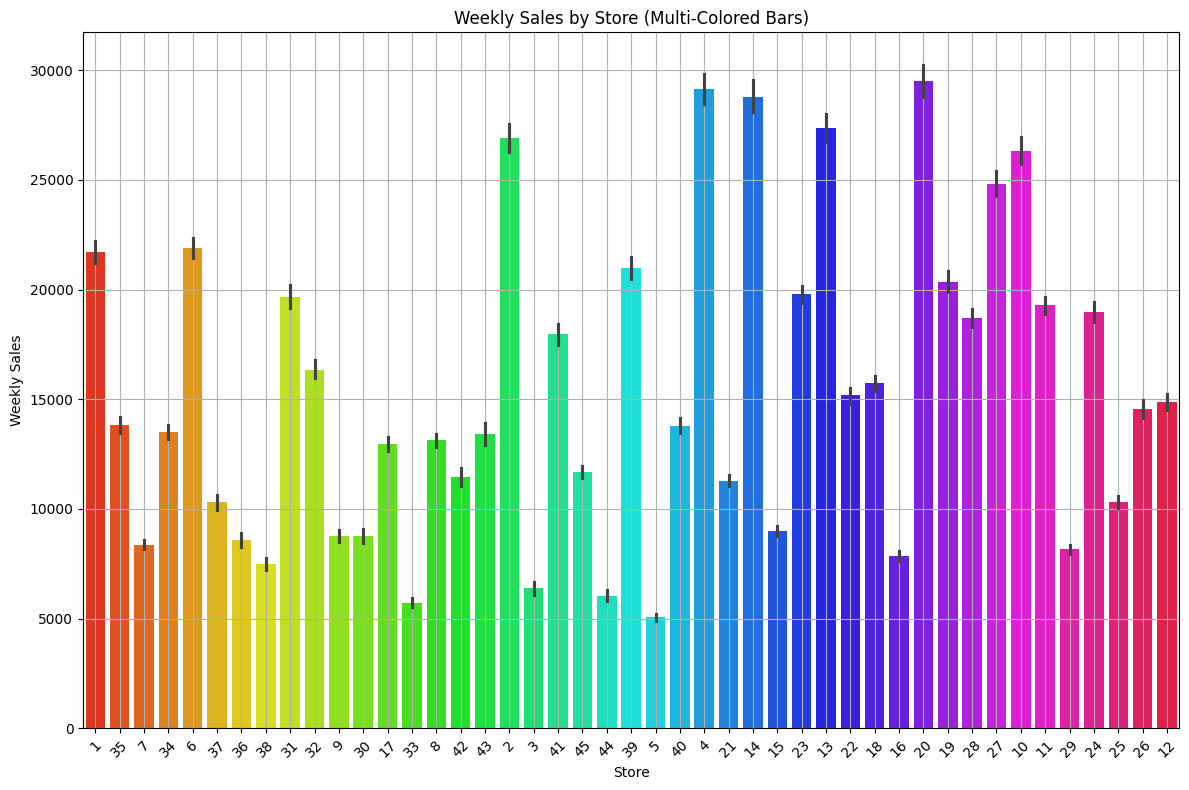

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a color palette
num_stores = final_df['store'].nunique()  # Get the number of unique stores
palette = sns.color_palette("hsv", num_stores)  # Generate a color palette with unique colors

# Step 2: Create the bar plot with multiple colors
plt.figure(figsize=(12, 8))
sns.barplot(x='store', y='weekly_sales', data=final_df, palette=palette)
plt.title('Weekly Sales by Store (Multi-Colored Bars)')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
final_df

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size,z_score,outlier
date,,,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,24924.50,0,0,151315,0.393781,False
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,3,14612.19,0,1,103681,-0.060282,False
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,4,26323.15,0,1,103681,0.455366,False
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,5,36414.63,0,1,103681,0.899705,False
2010-02-05,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,6,11437.81,0,1,103681,-0.200053,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,49,7770.71,0,0,219622,-0.361520,False
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,50,1486.00,0,0,219622,-0.638243,False
2012-10-26,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,52,4738.93,0,0,219622,-0.495013,False


**Correlation Heatmap for Numerical Features**

Understanding the relationships between numerical features, such as temperature, fuel_price, cpi, unemployment, and weekly_sales, can provide insights into how these factors affect sales.

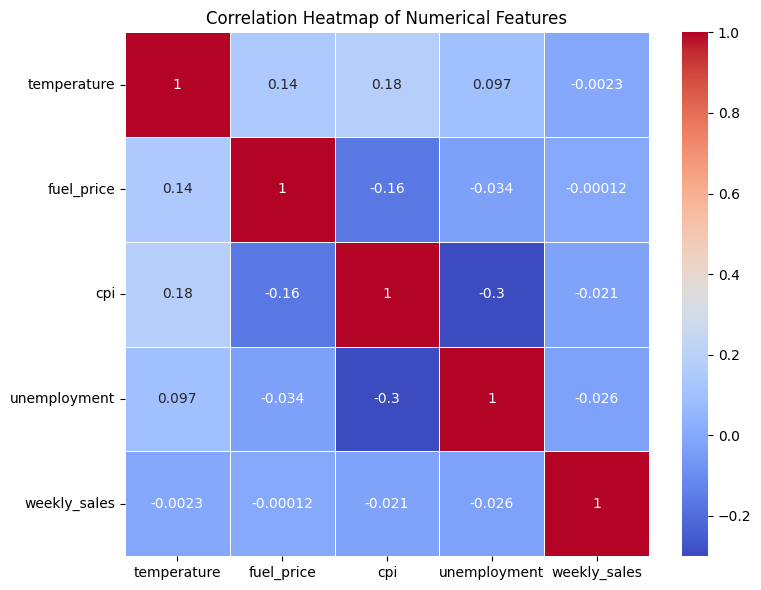

In [44]:
# Step 1: Select Numerical Columns for Correlation
numeric_columns = ['temperature', 'fuel_price', 'cpi', 'unemployment', 'weekly_sales']
correlation_matrix = final_df[numeric_columns].corr()

# Step 2: Create a Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


**Distribution of Sales Across All Stores**

Compare the distribution of weekly sales across all stores to identify if certain stores are outperforming or underperforming.

<ipython-input-45-a30934f1fed0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store', y='weekly_sales', data=store_sales, palette='viridis')


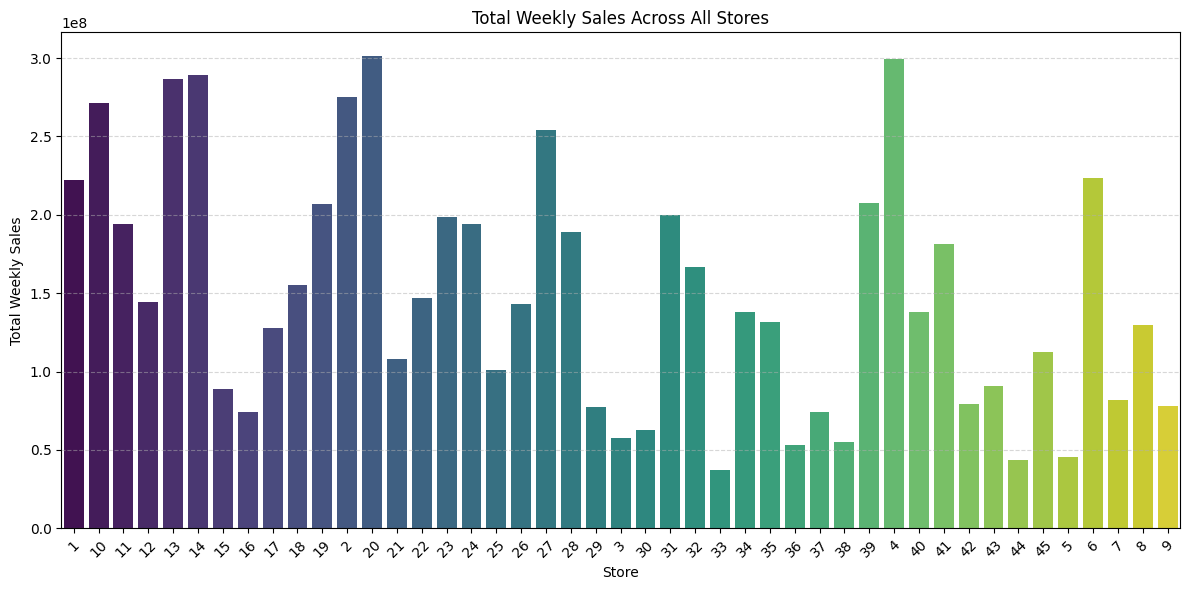

In [45]:
# Step 1: Aggregate Weekly Sales by Store
store_sales = final_df.groupby('store')['weekly_sales'].sum().reset_index()

# Step 2: Plot the Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='store', y='weekly_sales', data=store_sales, palette='viridis')
plt.title('Total Weekly Sales Across All Stores')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [46]:
# <= Ranking stores by weekly sales (combined for entire dates) =>

# Ensuring 'store' is of type integer for sorting
final_df['store'] = final_df['store'].astype(int)

# Aggregating weekly sales by stores
total_sales = final_df.groupby('store')['weekly_sales'].sum().reset_index()

# Sorting stores by total weekly sales in descending order
total_sales = total_sales.sort_values(by='weekly_sales', ascending=False)

print(total_sales)

    store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689e+07
2       3  5.758674e+07
37     38  5.515

The below approach provides a clear visual representation of the lowest-performing departments in Store 4, which can be useful for identifying areas that might need attention or improvement. Let me know if you need more adjustments!

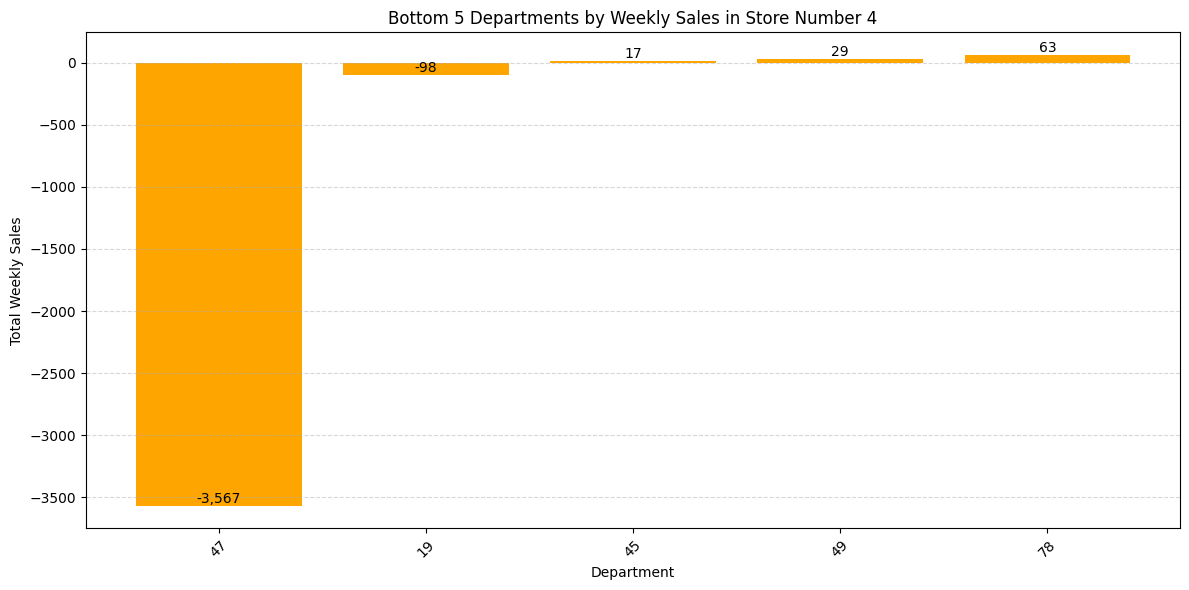

In [47]:
# Step 1: Filter Data for Store 35
# Extract sales data specifically for Store 35 to analyze its departmental performance.
store_35_df = final_df[final_df['store'] == 35]

# Step 2: Aggregate Weekly Sales by Department
# Sum up the weekly sales for each department within Store 4 to get total sales figures.
department_sales = store_35_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Step 3: Identify the Bottom 5 Departments by Sales
# Sort the departments by total sales in ascending order and select the bottom 5.
btm_departments = department_sales.sort_values(by='weekly_sales', ascending=True).head(5)

# Step 4: Plot Bar Chart for the Bottom 5 Departments
# Use a bar chart to visualize the lowest-performing departments by sales.
plt.figure(figsize=(12, 6))
bars = plt.bar(btm_departments['dept'].astype(str), btm_departments['weekly_sales'], color='orange')

# Step 5: Customize the Chart with Labels and Titles
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Bottom 5 Departments by Weekly Sales in Store Number 4')
plt.xticks(rotation=45)

# Add data labels on top of the bars for clarity
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Bar Chart Comparing Markdown Usage Across Bottom 5 Departments
If markdowns (discounts) are used, this visual can show if these departments had discounts and how it affected their sales.

<ipython-input-48-3c7b630409c8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_departments_markdowns, x='dept', y='total_markdown', palette='Blues')


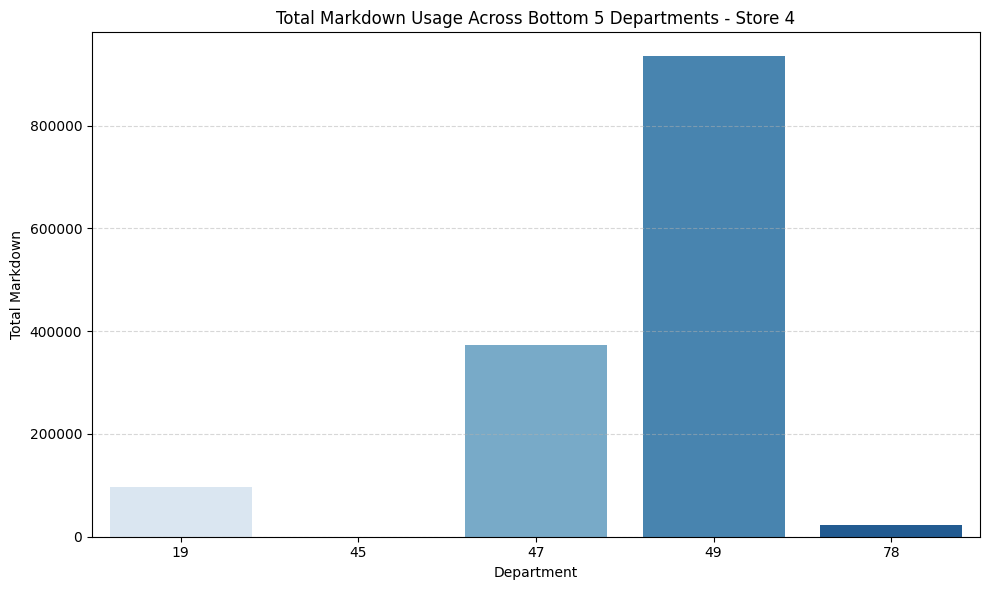

In [48]:
# Step 1: Filter Sales Data for the Bottom 5 Departments in Store 4
bottom_departments_data = store_35_df[store_35_df['dept'].isin(btm_departments['dept'])]

# Step 2: Calculate Total Markdown Across Bottom 5 Departments
markdown_columns = ['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']
bottom_departments_markdowns = bottom_departments_data[markdown_columns + ['dept']].groupby('dept').sum().reset_index()

# Step 3: Sum All Markdown Usage and Plot Bar Chart
bottom_departments_markdowns['total_markdown'] = bottom_departments_markdowns[markdown_columns].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_departments_markdowns, x='dept', y='total_markdown', palette='Blues')
plt.title('Total Markdown Usage Across Bottom 5 Departments - Store 4')
plt.xlabel('Department')
plt.ylabel('Total Markdown')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Compare Sales Before and After Markdown Usage**
Analyze if markdowns (discounts) are effectively boosting sales by comparing weekly sales before and after markdowns are applied.



<ipython-input-49-4b48c373c7c5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_with_without_markdown, x='has_markdown', y='weekly_sales', palette='coolwarm')


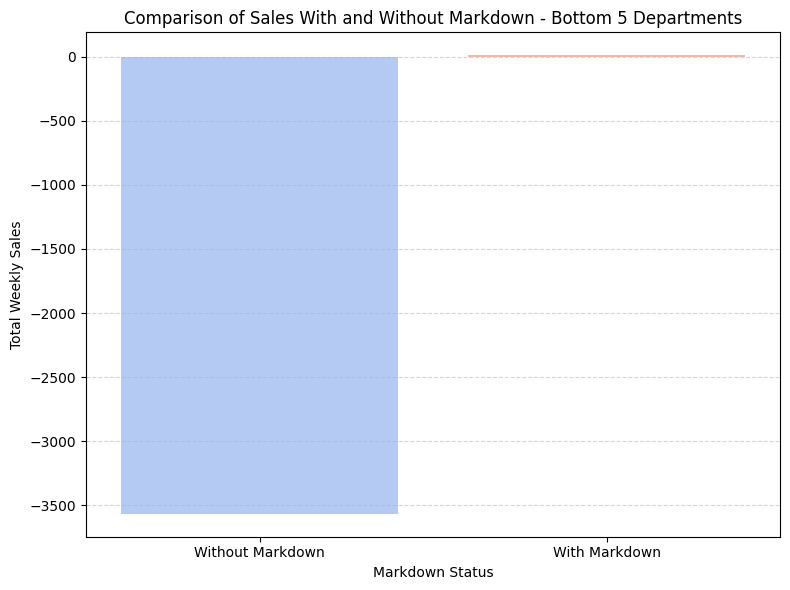

In [49]:
# Step 1: Create a Column to Identify Sales with and without Markdowns
bottom_departments_data['has_markdown'] = bottom_departments_data[markdown_columns].sum(axis=1) > 0

# Step 2: Aggregate Sales by Whether Markdowns Were Applied
sales_with_without_markdown = bottom_departments_data.groupby('has_markdown')['weekly_sales'].sum().reset_index()
sales_with_without_markdown['has_markdown'] = sales_with_without_markdown['has_markdown'].replace({True: 'With Markdown', False: 'Without Markdown'})

# Step 3: Plot the Comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_with_without_markdown, x='has_markdown', y='weekly_sales', palette='coolwarm')
plt.title('Comparison of Sales With and Without Markdown - Bottom 5 Departments')
plt.xlabel('Markdown Status')
plt.ylabel('Total Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **conclusion**
This notebook illustrates a comprehensive data integration workflow, beginning with data cleaning and standardization, followed by transformation, merging, and exploratory analysis. Standardizing column names and converting data types across datasets ensured smooth integration, reducing potential errors and inconsistencies during the merging process. Cleaning and feature engineering prepared the data for deeper analysis, making it easier to uncover hidden insights.

By consolidating data from various sources, the unified dataset facilitated more accurate and comprehensive analysis. The exploratory visualizations provided clear and actionable insights, and the modeling efforts demonstrated the predictive power of the integrated data. Overall, the data integration process enabled a holistic view of the information, allowing for more informed decision-making and effective strategy development. The workflow showcased here ensures that different datasets, even if structured differently, can be harmonized to create a cohesive dataset for robust analysis and predictive modeling.